In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [20]:
 df = pd.read_csv(r"C:\Users\TIBU\Downloads\CodvedaProject\3) Sentiment dataset.csv")
df #display dataframe

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


In [5]:
X = df[['Retweets']]
y = df['Likes'] 


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_test)

In [9]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [10]:
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])
print("R² Score:", r2)
print("Mean Squared Error:", mse)

Intercept: 0.06725730993595391
Coefficient: 1.9911383290786595
R² Score: 0.9978730690407323
Mean Squared Error: 0.43674183185404347


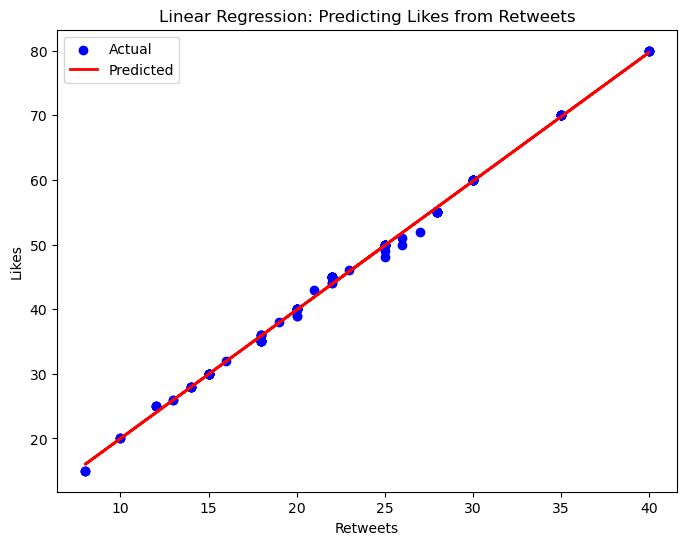

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Predicted")
plt.xlabel("Retweets")
plt.ylabel("Likes")
plt.title("Linear Regression: Predicting Likes from Retweets")
plt.legend()
plt.show()

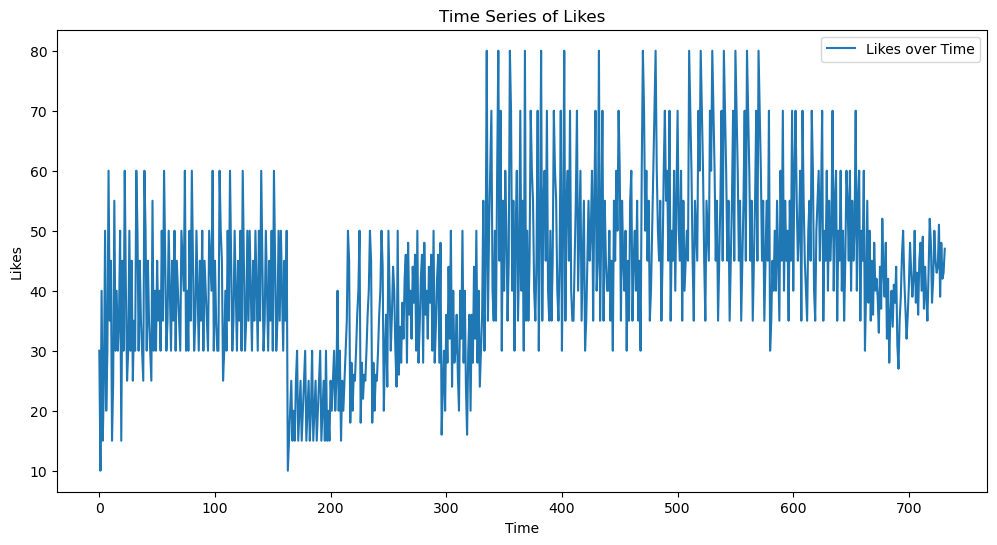

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df['Likes'], label='Likes over Time')
plt.xlabel("Time")
plt.ylabel("Likes")
plt.title("Time Series of Likes")
plt.legend()
plt.show()

In [15]:
decomposition = seasonal_decompose(df['Likes'], model='additive', period=24)

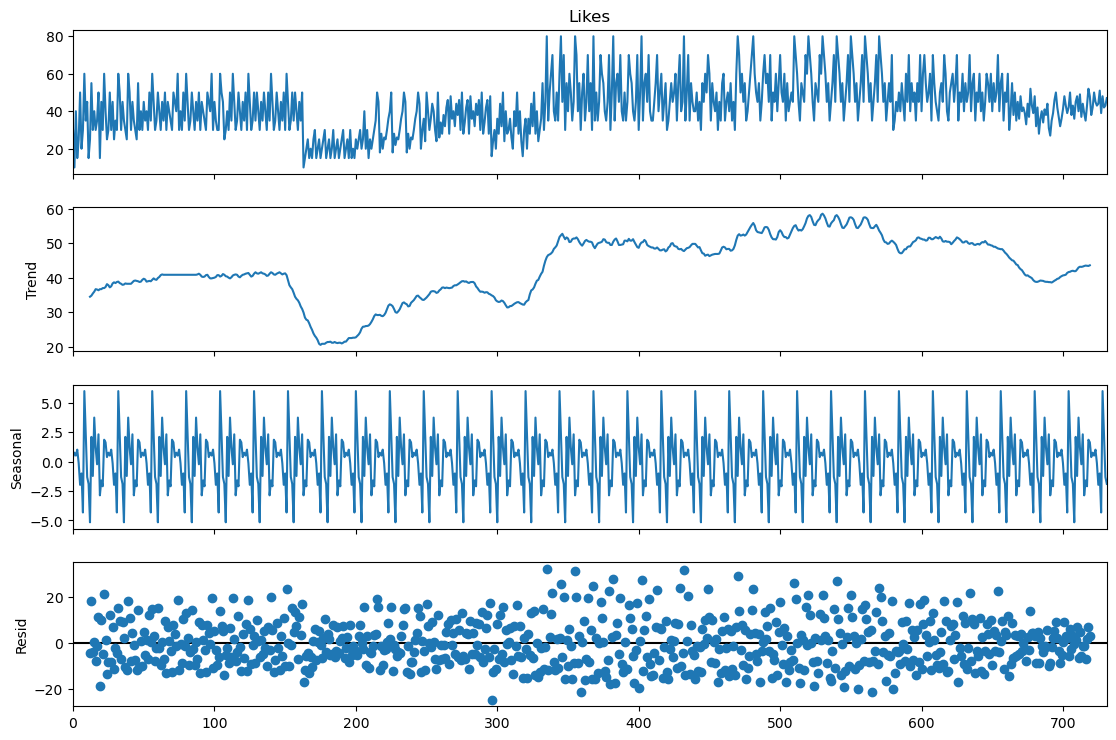

In [16]:
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

In [17]:
df['Likes_MA'] = df['Likes'].rolling(window=7).mean()

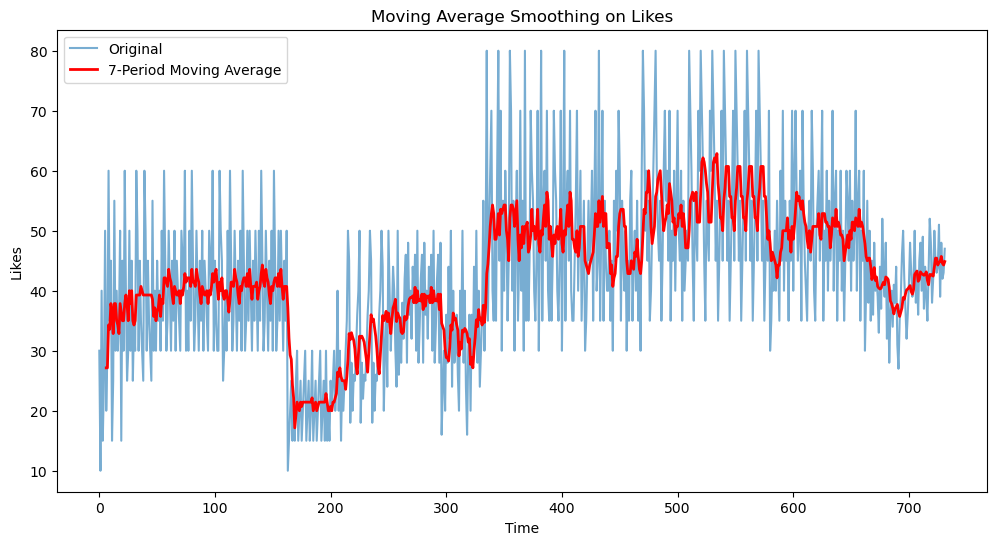

In [18]:
plt.figure(figsize=(12,6))
plt.plot(df['Likes'], label='Original', alpha=0.6)
plt.plot(df['Likes_MA'], label='7-Period Moving Average', color='red', linewidth=2)
plt.xlabel("Time")
plt.ylabel("Likes")
plt.title("Moving Average Smoothing on Likes")
plt.legend()
plt.show()

In [21]:
X = df[['Likes', 'Retweets']]

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

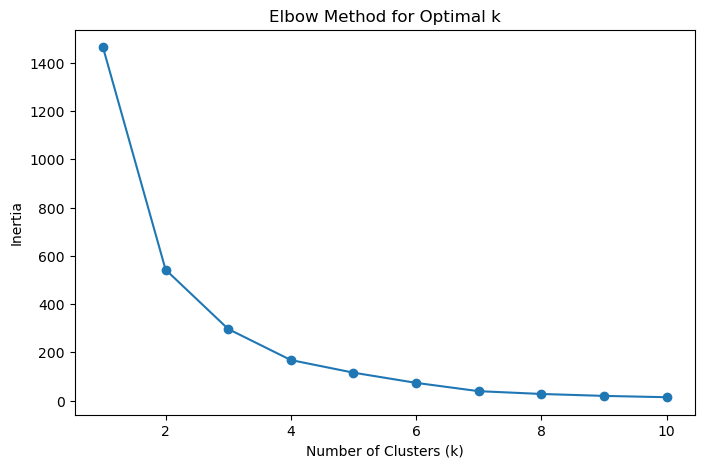

In [24]:
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

In [25]:

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

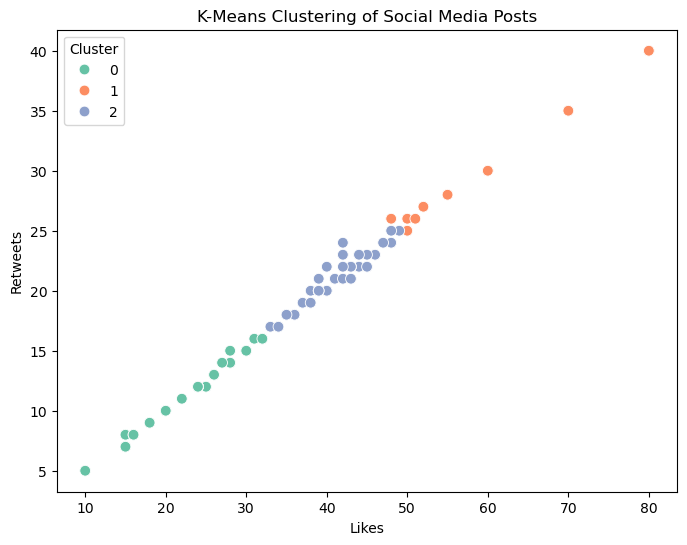

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['Likes'], 
    y=df['Retweets'], 
    hue=df['Cluster'], 
    palette='Set2', 
    s=60
)
plt.xlabel("Likes")
plt.ylabel("Retweets")
plt.title("K-Means Clustering of Social Media Posts")
plt.legend(title="Cluster")
plt.show()